# Tarea Semanal N6
Se debe diseñar un filtro pasa-altos, que presente máxima planicidad en la banda de paso (frecuencia de corte = 300 Hz) y un cero de transmisión en 100 Hz. El prototipo pasabajos normalizado presenta la siguiente respuesta:
<div>
<img src="img/rta-enunciado.PNG" alt="Drawing" style="width: 600px;"/>
</div>

- Determine la expresión de H(s) del filtro pasa-altos normalizado                    
- Realizar el diagrama de polos y ceros de H(s)                                             
- Sintetice el circuito del filtro pedido. Se utilizará para la estructura de segundo orden el siguiente circuito:
<div>
<img src="img/circuito-enunciado.PNG" alt="Drawing" style="width: 600px;"/>
</div>

- Compare la estructura sugerida y discuta las similitudes y diferencias con la red propuesta por Schaumann:
<div>
<img src="img/circuito-schaumann.PNG" alt="Drawing" style="width: 600px;"/>
</div>

Sabiendo que la transferencia cae luego del cero en 100Hz, el denominador debe ser de orden 3, si fuera de orden 2 constituiría un filtro Notch, sin tener la pendiente que se muestra en la transferencia para $w\rightarrow\infty$. Por lo tanto, la transferencia tendrá la siguiente expresión:
$$ \lvert T(s)\rvert=\frac{1}{9}\frac{1}{s+1}\frac{s^2+3^2}{s^2+s+1}$$

La expresión tiene la siguiente respuesta:

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

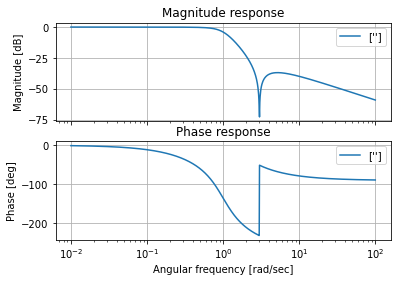

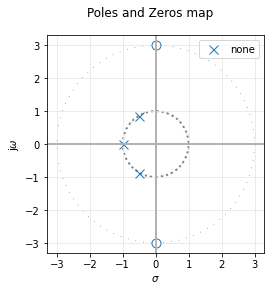

In [8]:
from splane import pzmap, bodePlot
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt


my_tf = TransferFunction( [(1/9)*1, 0, (1/9)*9], [1, 2, 2, 1] )

bodePlot(my_tf)
pzmap(my_tf)

Se puede ver que la transferencia cumple con la respuesta del enunciado. Por lo tanto, aplicamos la transformación pasabajos a pasaaltos $k=\frac{1}{s}$:

$$ \lvert T(s)\rvert=\frac{s}{s+1}\frac{s^2+\frac{1}{9}}{s^2+s+1}$$

La expresión tiene la siguiente respuesta:

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

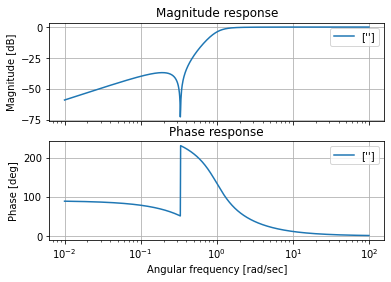

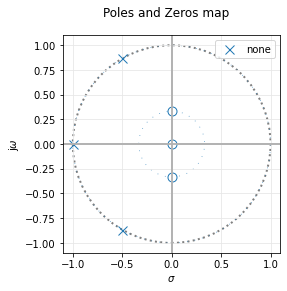

In [9]:
my_tf = TransferFunction( [1, 0, 1/9, 0], [1, 2, 2, 1] )

bodePlot(my_tf)
pzmap(my_tf)

La transferencia del filtro de orden 2 para sintetizar la transferencia es:
$$ \lvert T(s)\rvert=\frac{s^2+\frac{1}{C^2R}\frac{R_1-R_2}{R_1R_2}}{s^2+s.\frac{1}{R_1C}+\frac{1}{RR_2C^2}}$$

Para cumplir con las condiciones propuestas, las relaciones de los componentes son:

$$\frac{1}{R_1C}=1$$

$$\frac{1}{RR_2C^2}=1$$

$$\frac{1}{RC^2}\frac{R_1-R_2}{R_1R_2}=\frac{1}{9}$$

In [2]:
import numpy as np
# Defino r_1 = 1
r_1 = 1
r_2 = (8/9)*r_1
c = 1/r_1
r = r_1**2/r_2

print('Componentes normalizados:')
print('C={:.4f} - R={:.4f} - R1={:.4f} - R2={:.4f}'.format(c, r, r_1, r_2))

norma_z = 1e3
norma_w = 2*np.pi*300

c = c/(norma_z*norma_w)
r = (r*norma_z)
r_1 = (r_1*norma_z)
r_2 = (r_2*norma_z)

print('Componentes desnormalizados:')
print('C={:.3e} F - R={:.4e} Ohm - R1={:.4e} Ohm - R2={:.4e} Ohm'.format(c, r, r_1, r_2))

Componentes normalizados:
C=1.0000 - R=1.1250 - R1=1.0000 - R2=0.8889
Componentes desnormalizados:
C=5.305e-07 F - R=1.1250e+03 Ohm - R1=1.0000e+03 Ohm - R2=8.8889e+02 Ohm


Para cumplir con todas las condiciones, se le debe agregar un filtro de orden 1 pasa altos a la salida, logrando de esta forma la transferencia del enunciado. Para ello, se usará un pasa altos CR con corte en 300Hz. La transferencia de un CR tiene la siguiente forma:

$$ \lvert T(s)\rvert=\frac{s}{s+s\frac{1}{RC}}$$

In [3]:
# 1/(RC) = 1
r_hp = 1
c_hp = 1

print('Componentes normalizados:')
print('C={:.4f} - R={:.4f}'.format(c_hp, r_hp))

r_hp = r_hp*norma_z
c_hp = c_hp/(norma_z*norma_w)

print('Componentes desnormalizados:')
print('C={:.3e} F - R={:.4e} Ohm'.format(c_hp, r_hp))

Componentes normalizados:
C=1.0000 - R=1.0000
Componentes desnormalizados:
C=5.305e-07 F - R=1.0000e+03 Ohm


Para la simulación, se implementó el siguiente circuito en LTSpice:
<div>
<img src="img/circuito-spice.PNG" alt="Drawing" style="width: 800px;"/>
</div>

A lo que se obtuvo la siguiente respuesta:
<div>
<img src="img/grafico-spice.PNG" alt="Drawing" style="width: 800px;"/>
</div>

El filtro propuesto por el Schaumann tiene la particularidad que permite colocar polos en cualquier punto del plano. Además, puede implementar cualquier función bicuadrática, ya que su transferencia presenta los 3 términos (cuadrático, lineal e independiente) tanto en el numerador como en el denominador:
<div>
<img src="img/transferencia-schaumann.PNG" alt="Drawing" style="width: 400px;"/>
</div>